Projet Zillow-Prize 2019
Khalfaoui Ellyes
Imen Rezoug
Mohamed Benyassine

In [51]:
import pandas as pd
import warnings
train = pd.read_csv('./properties_2016.csv', sep=',', quotechar='"')
warnings.filterwarnings("ignore") # supprime les warnings f


Dans la partie pré traitement,
on a commencé d'abord par regarder notre jeu de données, voir quel type de probleme pourrait etre lié par rapport à ces données, comprendre ce que represente chaque caractéristique( attributs), d'abord par un appercu des premieres lignes du dataset, puis les statistiques déscriptives(mean,std..) pour chaque attribut, nous avons ensuite regarder le domaine des instances,puis pour des raisons de lisibilité, nous avons recoder les noms des attributs, après avoir lu le dictionnaire joint au dataset, nous avons ensuite regardé les valeurs nulles (Nan) et leurs proportion dans le dataset, nous avons pris la décision d'éxclure certains attributs du traitement si le taux est proche de 100% de valeurs nulles, nous avons remplacé les valeurs manquantes des autres attributs par la valeur la plus representé (mod), on a vu d'autres méthodes pour le traitement des valeurs manquantes, dans un travail d'une autre personne, ils ont utilisé K-nn pour trouver les valeurs manquantes..

Nous avons ensuite combiné deux fichier pour avoir notre dataset d'entrainement (ajout du fichier de logerror correspondant à l'ID de la proprieté), nous avons ensuite fait des visualisations  afin de voir la pértinenace des attributs, et notamment en associant le logerror qui represente la donnée cible du problème avec d'autres attributs, comme par exmple l'évolution du logerror (valeur absolue) au fil des mois pour l'année 2016

Nous avons ensuite visualisé les corrélation entre les attributs (corrélation de Pearson) afin de détérminer les attributs pertinents

Nous avons également transformé les valeurs ordinales en valeurs quantitatives pour certains attributs avant de réaliser une normalisation des données (afin que les résultats de modèles statistiques ne soient pas biaisiés par la différence d'échelle des valeurs des différents attributs).




In [52]:
train.head()
"""affichage des premieres lignes du dataset"""

'affichage des premieres lignes du dataset'

In [53]:
"""affichage des statistiques de bases sur les attributs du dataset"""
train.describe()



,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,1.000000,7.000000,272.000000,2.000000e+00,2.000000e+00,3.000000,4.000000e+00,2.000000e+00,66.0,...,96.000000,1.950000e+03,1.000000,7.480000e+04,1.796750e+05,2.015000e+03,7.483600e+04,2.461070e+03,14.000000,6.037400e+13
50%,1.254509e+07,1.000000,7.000000,534.000000,2.000000e+00,3.000000e+00,4.000000,7.000000e+00,2.000000e+00,66.0,...,168.000000,1.963000e+03,1.000000,1.225900e+05,3.060860e+05,2.015000e+03,1.670420e+05,3.991780e+03,14.000000,6.037572e+13
75%,1.409712e+07,1.000000,7.000000,847.250000,3.000000e+00,4.000000e+00,4.000000,7.000000e+00,3.000000e+00,66.0,...,320.000000,1.981000e+03,2.000000,1.968890e+05,4.880000e+05,2.015000e+03,3.069180e+05,6.201005e+03,15.000000,6.059042e+13
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [54]:
train.shape
"""taille du dataset"""

'taille du dataset'

In [55]:
"""domaine des instances"""
for key in train.keys():
    print (key, ": [", min(train[key]), max(train[key]), "]")
    print ('U')
   

('parcelid', ': [', 10711725, 169601949, ']')
U
('airconditioningtypeid', ': [', nan, nan, ']')
U
('architecturalstyletypeid', ': [', nan, nan, ']')
U
('basementsqft', ': [', nan, nan, ']')
U
('bathroomcnt', ': [', 0.0, 20.0, ']')
U
('bedroomcnt', ': [', 0.0, 20.0, ']')
U
('buildingclasstypeid', ': [', nan, nan, ']')
U
('buildingqualitytypeid', ': [', nan, nan, ']')
U
('calculatedbathnbr', ': [', nan, nan, ']')
U
('decktypeid', ': [', nan, nan, ']')
U
('finishedfloor1squarefeet', ': [', nan, nan, ']')
U
('calculatedfinishedsquarefeet', ': [', nan, nan, ']')
U
('finishedsquarefeet12', ': [', nan, nan, ']')
U
('finishedsquarefeet13', ': [', nan, nan, ']')
U
('finishedsquarefeet15', ': [', nan, nan, ']')
U
('finishedsquarefeet50', ': [', nan, nan, ']')
U
('finishedsquarefeet6', ': [', nan, nan, ']')
U
('fips', ': [', 6037.0, 6111.0, ']')
U
('fireplacecnt', ': [', nan, nan, ']')
U
('fullbathcnt', ': [', nan, nan, ']')
U
('garagecarcnt', ': [', nan, nan, ']')
U
('garagetotalsqft', ': [', na

In [56]:
"""renommer les attributs pour plus de clarté (inspiré d'un notebook fait avec R)"""
train.rename(columns = {  "parcelid" : "id_parcel",
  "yearbuilt" : "build_year",
  "basementsqft" : "area_basement",
  "yardbuildingsqft17" : "area_patio",
  "yardbuildingsqft26" : "area_shed", 
  "poolsizesum" : "area_pool",  
  "lotsizesquarefeet" : "area_lot", 
  "garagetotalsqft" : "area_garage",
  "finishedfloor1squarefeet" : "area_firstfloor_finished",
  "calculatedfinishedsquarefeet" : "area_total_calc",
  "finishedsquarefeet6" : "area_base",
  "finishedsquarefeet12" : "area_live_finished",
  "finishedsquarefeet13" : "area_liveperi_finished",
  "finishedsquarefeet15" : "area_total_finished",  
  "finishedsquarefeet50" : "area_unknown",
  "unitcnt" : "num_unit", 
  "numberofstories" : "num_story",  
  "roomcnt" : "num_room",
  "bathroomcnt" : "num_bathroom",
  "bedroomcnt" : "num_bedroom",
  "calculatedbathnbr" : "num_bathroom_calc",
  "fullbathcnt" : "num_bath",  
  "threequarterbathnbr" : "num_75_bath", 
  "fireplacecnt" : "num_fireplace",
  "poolcnt" : "num_pool",  
  "garagecarcnt" : "num_garage",  
  "regionidcounty" : "region_county",
  "regionidcity" : "region_city",
  "regionidzip" : "region_zip",
  "regionidneighborhood" : "region_neighbor",  
  "taxvaluedollarcnt" : "tax_total",
  "structuretaxvaluedollarcnt" : "tax_building",
  "landtaxvaluedollarcnt" : "tax_land",
  "taxamount" : "tax_property",
  "assessmentyear" : "tax_year",
  "taxdelinquencyflag" : "tax_delinquency",
  "taxdelinquencyyear" : "tax_delinquency_year",
  "propertyzoningdesc" : "zoning_property",
  "propertylandusetypeid" : "zoning_landuse",
  "propertycountylandusecode" : "zoning_landuse_county",
  "fireplaceflag" : "flag_fireplace", 
  "hashottuborspa" : "flag_tub",
  "buildingqualitytypeid" : "quality",
  "buildingclasstypeid" : "framing",
  "typeconstructiontypeid" : "material",
  "decktypeid" : "deck",
  "storytypeid" : "story",
  "heatingorsystemtypeid" : "heating",
  "airconditioningtypeid" : "aircon",
  "architecturalstyletypeid": "architectural_style"}, 
                                 inplace = True) 

In [58]:
print train.head()


   id_parcel  aircon  architectural_style  area_basement  num_bathroom  \
0   10754147     NaN                  NaN            NaN           0.0   
1   10759547     NaN                  NaN            NaN           0.0   
2   10843547     NaN                  NaN            NaN           0.0   
3   10859147     NaN                  NaN            NaN           0.0   
4   10879947     NaN                  NaN            NaN           0.0   

   num_bedroom  framing  quality  num_bathroom_calc  deck  ...  num_story  \
0          0.0      NaN      NaN                NaN   NaN  ...        NaN   
1          0.0      NaN      NaN                NaN   NaN  ...        NaN   
2          0.0      NaN      NaN                NaN   NaN  ...        NaN   
3          0.0      3.0      7.0                NaN   NaN  ...        1.0   
4          0.0      4.0      NaN                NaN   NaN  ...        NaN   

   flag_fireplace  tax_building  tax_total  tax_year  tax_land  tax_property  \
0           

In [59]:
""" Affichage du nombre de  Valeurs manquantes pour chaque attributs"""
print('nombre de valeurs manquantes pour chaque attributs:\n')

print ('\n')
print( train.isnull().sum())
"""affichage du nombre total de valeur manquantes"""
print ('\n')
print('nombre total de valeurs manquantes: ',train.isnull().sum().sum())

nombre de valeurs manquantes pour chaque attributs:



id_parcel                         0
aircon                      2173698
architectural_style         2979156
area_basement               2983589
num_bathroom                  11462
num_bedroom                   11450
framing                     2972588
quality                     1046729
num_bathroom_calc            128912
deck                        2968121
area_firstfloor_finished    2782500
area_total_calc               55565
area_live_finished           276033
area_liveperi_finished      2977545
area_total_finished         2794419
area_unknown                2782500
area_base                   2963216
fips                          11437
num_fireplace               2672580
num_bath                     128912
num_garage                  2101950
area_garage                 2101950
flag_tub                    2916203
heating                     1178816
latitude                      11437
longitude                     11437
area_lot 

On peut voir que le nombre de valeurs manquantes est énorme pour certains attributs, sachant que le nombre de valeurs possible pour chauqe attribut est : 2985217.

In [60]:
missing_nb = train.isnull().sum()


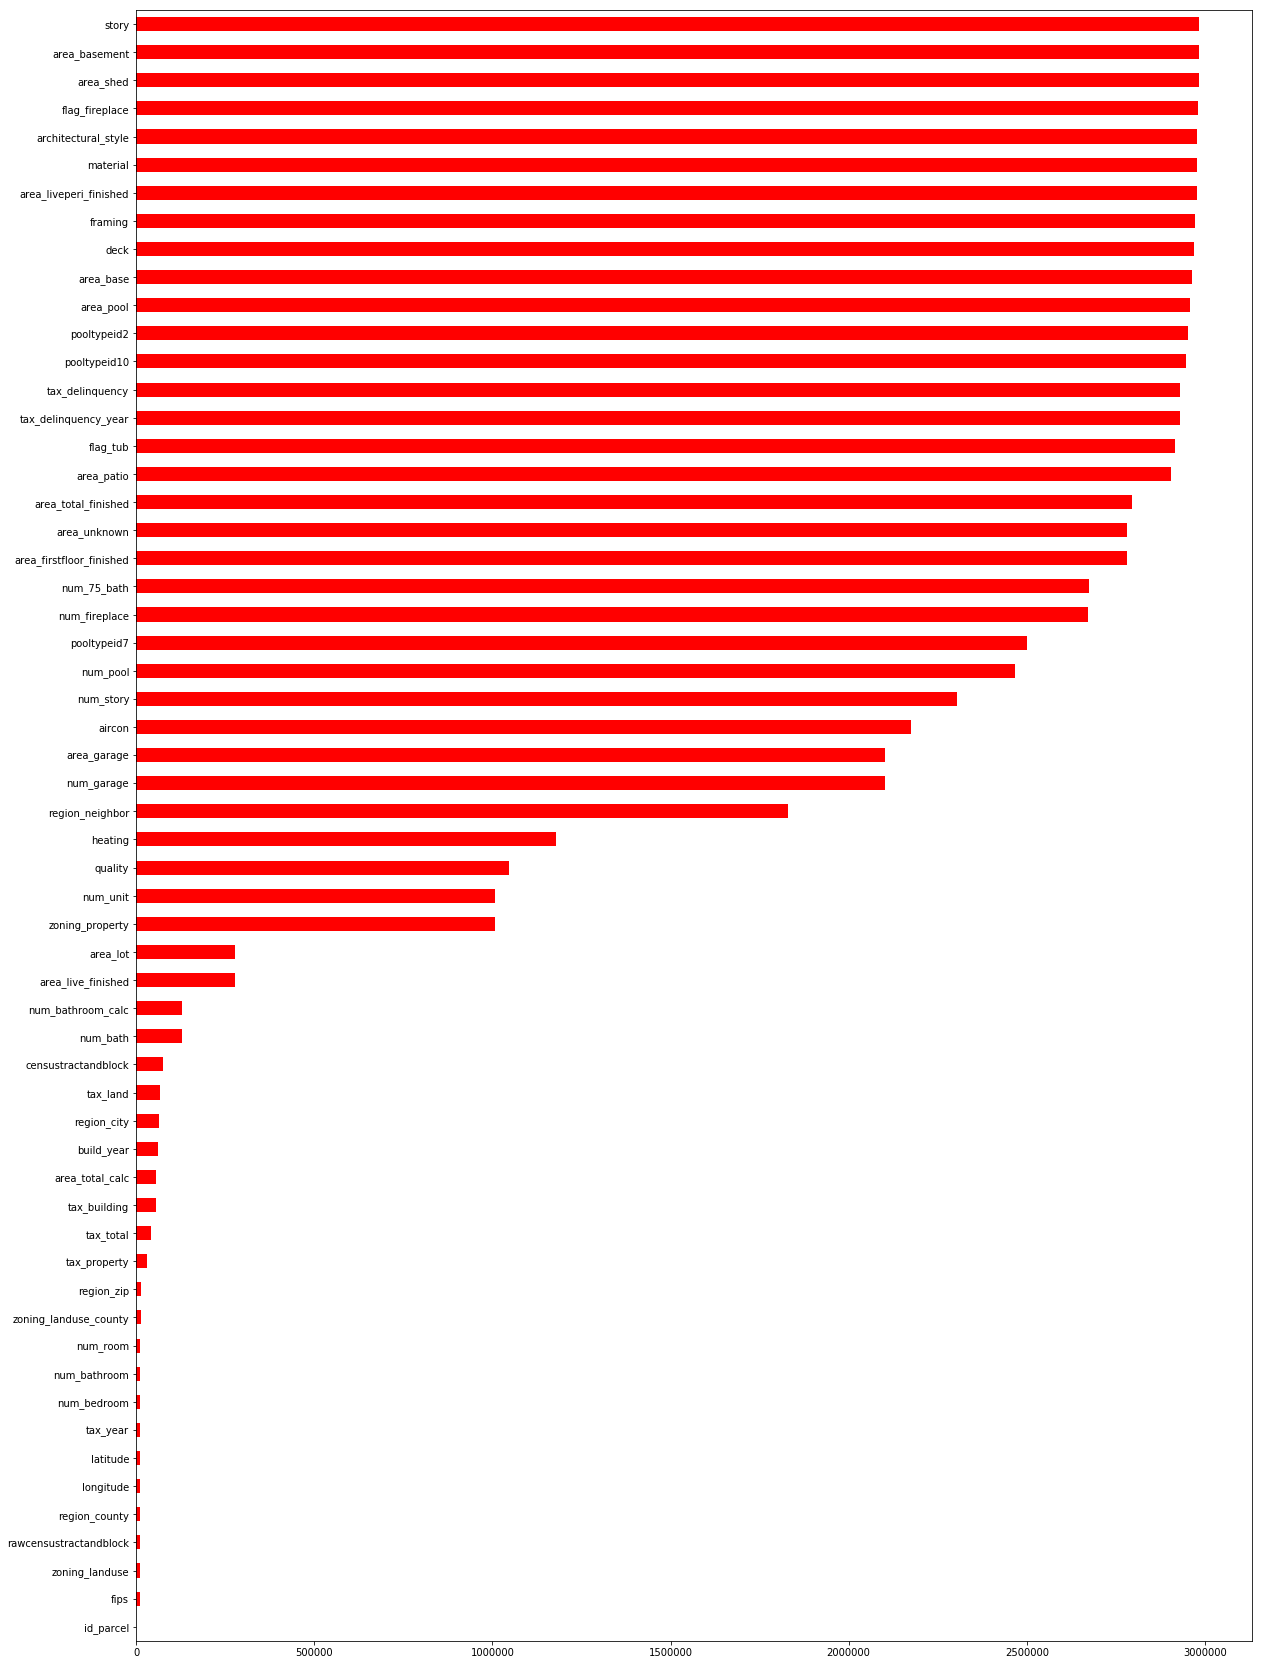

In [61]:
""" affichage des valeurs manquantes pour tous les attributs en forme de graphique pour mieux appércevoir la proportion"""
#print missing_nb.keys()

##missing_nb.plot.bar()
#ax = missing_nb.plot.bar(rot=0)
import matplotlib.pyplot as plt

ax = missing_nb.sort_values(ascending=True).plot.barh(x=missing_nb.keys(), figsize=(20, 30), color= 'r')




   parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
   parcelid  logerror transactiondate  abslogerror
0  11016594    0.0276      2016-01-01       0.0276
1  14366692   -0.1684      2016-01-01       0.1684
2  12098116   -0.0040      2016-01-01       0.0040
3  12643413    0.0218      2016-01-02       0.0218
4  14432541   -0.0050      2016-01-02       0.0050
PeriodIndex(['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
             '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12'],
            dtype='period[M]', name=u'transactiondate', freq='M')


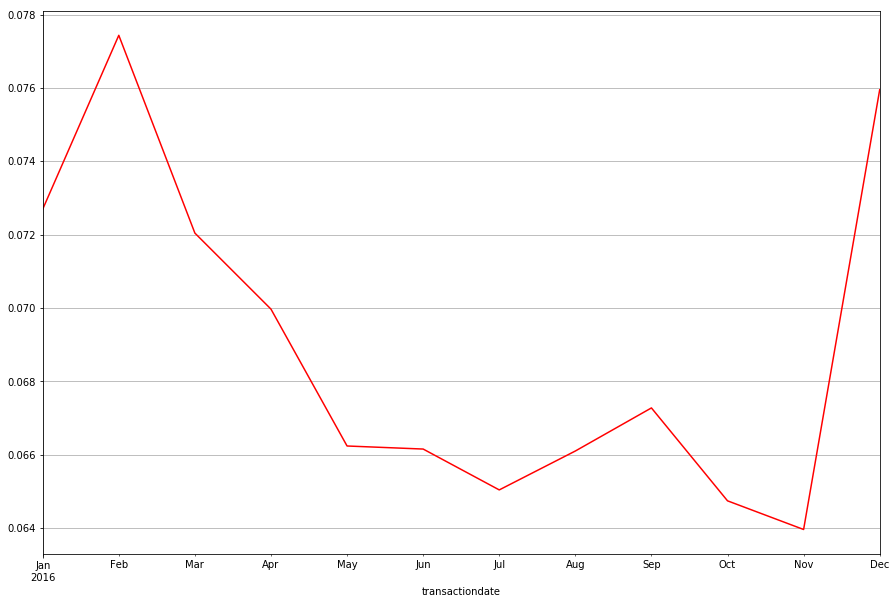

In [62]:
"""importation du fichier qui contient les logerrors et date de transactions"""
logerror_2016 = pd.read_csv('./train_2016_v2.csv', sep=',', quotechar='"')
import pandas as pd


print (logerror_2016.head())

logerror_2016['abslogerror'] =logerror_2016['logerror'].abs()


logerror_2016['transactiondate'] = pd.to_datetime(logerror_2016['transactiondate'])
print type(logerror_2016['transactiondate'][0])
print logerror_2016.head()
a =logerror_2016.groupby(logerror_2016['transactiondate'].dt.to_period("M"))['abslogerror'].mean()

print a.keys()
# un plot qui affiche la valeur absolue du logerror par mois
ax =a.plot.line(x=a.keys(), figsize=(15, 10), color= 'r', grid='true')


Si on affiche les valeurs absolues des logerror(prix prédit du zestimate - log du prix réel) on remarque que les valeurs absolue diminuent avec le temps

In [63]:
""" inner join entre la table de donnée des caractéristiques des propriétés et des log errors"""

merged = pd.merge(train,logerror_2016, left_on='id_parcel', right_on='parcelid', how='inner').drop('parcelid', axis=1)
print (merged.shape)
print(merged.head())




(90275, 61)
   id_parcel  aircon  architectural_style  area_basement  num_bathroom  \
0   17073783     NaN                  NaN            NaN           2.5   
1   17088994     NaN                  NaN            NaN           1.0   
2   17100444     NaN                  NaN            NaN           2.0   
3   17102429     NaN                  NaN            NaN           1.5   
4   17109604     NaN                  NaN            NaN           2.5   

   num_bedroom  framing  quality  num_bathroom_calc  deck  ...  tax_total  \
0          3.0      NaN      NaN                2.5   NaN  ...   191811.0   
1          2.0      NaN      NaN                1.0   NaN  ...   239679.0   
2          3.0      NaN      NaN                2.0   NaN  ...    47853.0   
3          2.0      NaN      NaN                1.5   NaN  ...    62914.0   
4          4.0      NaN      NaN                2.5   NaN  ...   554000.0   

   tax_year  tax_land  tax_property  tax_delinquency  tax_delinquency_year  \
0 

In [64]:
"""proprtion des valeurs manquantes par rapport à la taille des données (n taille de l'ensmble de données S)"""
print( merged.isnull().sum()/merged.shape[0]*100)

id_parcel                    0.000000
aircon                      68.118527
architectural_style         99.710883
area_basement               99.952368
num_bathroom                 0.000000
num_bedroom                  0.000000
framing                     99.982276
quality                     36.456383
num_bathroom_calc            1.309333
deck                        99.271116
area_firstfloor_finished    92.405428
area_total_calc              0.732207
area_live_finished           5.183052
area_liveperi_finished      99.963445
area_total_finished         96.052063
area_unknown                92.405428
area_base                   99.533647
fips                         0.000000
num_fireplace               89.358073
num_bath                     1.309333
num_garage                  66.837995
area_garage                 66.837995
flag_tub                    97.380227
heating                     37.878704
latitude                     0.000000
longitude                    0.000000
area_lot    

On remarque que pour certains attributs, la proportion de valeurs manquantes est proche de 100%, ces attributs sont donc à priori non nécéssaire pour faire notre étude sur cet ensmble

In [65]:
merged.drop(['architectural_style', 'area_basement', 'framing', 'deck','area_base', 'area_liveperi_finished',
            'area_base', 'pooltypeid10', 'pooltypeid2', 'story', 'material', 'area_shed', 'flag_fireplace' ], axis='columns', inplace=True)


In [66]:
""" traitement des valeurs manquantes, on a choisi le mode comme mesure de remplacement"""
from scipy.stats import mode
merged['num_bathroom_calc'].mode()

for key in merged.keys():
    merged[key].fillna(merged[key].mode().iloc[0], inplace=True)

In [67]:
"""domaine du logerror (cible)"""
print min(merged['logerror']), max(merged['logerror'])

-4.605 4.737


On s'appércoit que les valeurs des attributs ont des échélles différentes, on se doit de les normaliser pour qu'on ai pas des valeurs qui vont biaiser nos modèles, on doit aussi regarder les types des valeurs, si y'a des valeurs de type booléen ou de type nominale, on se doit des les normaliser aussi, car la plus part des modèles statistiques s'appliquent sur des données numériques à priori et en particulier dans notre cas, car notre probleme 
est à priori un probleme de régréssion.

In [68]:
"""affichage des types des """

for key in merged.keys():

    print (key, type(merged[key][0]))

    

('id_parcel', <type 'numpy.int64'>)
('aircon', <type 'numpy.float64'>)
('num_bathroom', <type 'numpy.float64'>)
('num_bedroom', <type 'numpy.float64'>)
('quality', <type 'numpy.float64'>)
('num_bathroom_calc', <type 'numpy.float64'>)
('area_firstfloor_finished', <type 'numpy.float64'>)
('area_total_calc', <type 'numpy.float64'>)
('area_live_finished', <type 'numpy.float64'>)
('area_total_finished', <type 'numpy.float64'>)
('area_unknown', <type 'numpy.float64'>)
('fips', <type 'numpy.float64'>)
('num_fireplace', <type 'numpy.float64'>)
('num_bath', <type 'numpy.float64'>)
('num_garage', <type 'numpy.float64'>)
('area_garage', <type 'numpy.float64'>)
('flag_tub', <type 'numpy.bool_'>)
('heating', <type 'numpy.float64'>)
('latitude', <type 'numpy.float64'>)
('longitude', <type 'numpy.float64'>)
('area_lot', <type 'numpy.float64'>)
('num_pool', <type 'numpy.float64'>)
('area_pool', <type 'numpy.float64'>)
('pooltypeid7', <type 'numpy.float64'>)
('zoning_landuse_county', <type 'str'>)
('zo

In [69]:
"""affichage tabulaire des types d'attributs"""
pd.options.display.max_rows = 65

dtype_df = merged.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df
def background_color(val):
    if val == object:
        color = 'yellow'
    elif val == int:
        color = 'pink'
    elif val == float:
        color = 'crimson'
    else: color = 'orange'
    return 'background-color: {}'.format(color)
s = dtype_df.style.applymap(background_color)
s


,Count,Column Type
0,id_parcel,int64
1,aircon,float64
2,num_bathroom,float64
3,num_bedroom,float64
4,quality,float64
5,num_bathroom_calc,float64
6,area_firstfloor_finished,float64
7,area_total_calc,float64
8,area_live_finished,float64
9,area_total_finished,float64


transactiondate
2016-01    0.072695
2016-02    0.077434
2016-03    0.072044
2016-04    0.069972
2016-05    0.066241
2016-06    0.066158
2016-07    0.065044
2016-08    0.066104
2016-09    0.067279
2016-10    0.064746
2016-11    0.063965
2016-12    0.075952
Freq: M, Name: abslogerror, dtype: float64
Index([bool, int64, float64, datetime64[ns], object], dtype='object', name=u'Column Type')


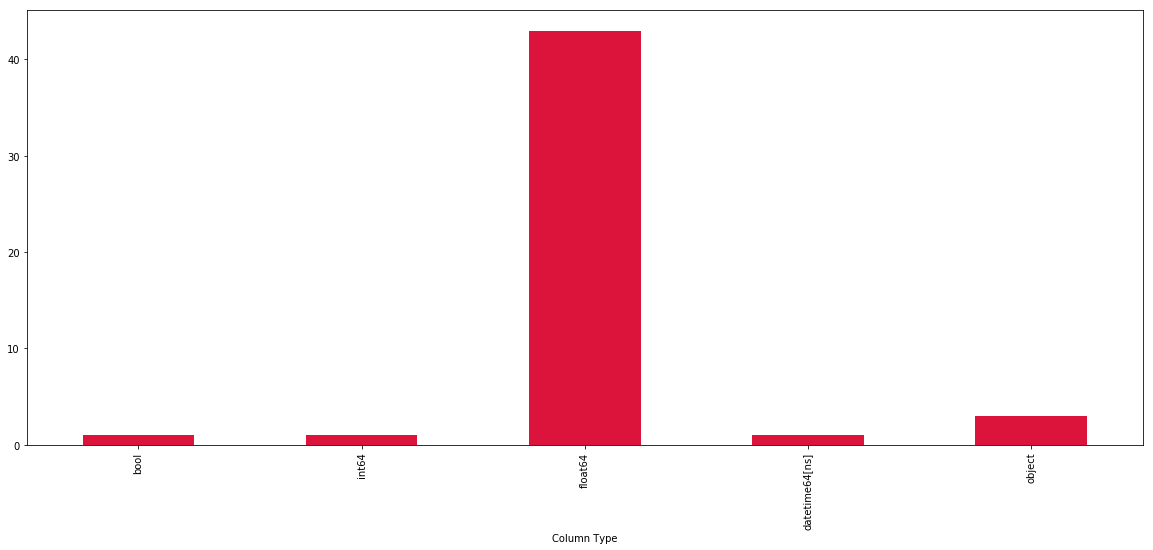

In [70]:
"""affichage graphique des types d'attributs"""


d = dtype_df.groupby("Column Type").aggregate('count').reset_index()

print a
d =dtype_df.groupby(dtype_df["Column Type"])['Count'].count()


print d.keys()
ax =d.plot.bar(x=d.keys(),figsize=(20, 8), color= 'crimson', grid='false')


In [71]:
del merged['abslogerror']
# suprresion de la colonne de abslogerror qui a servit d'étudier la valeur en fonction des mois de transaction

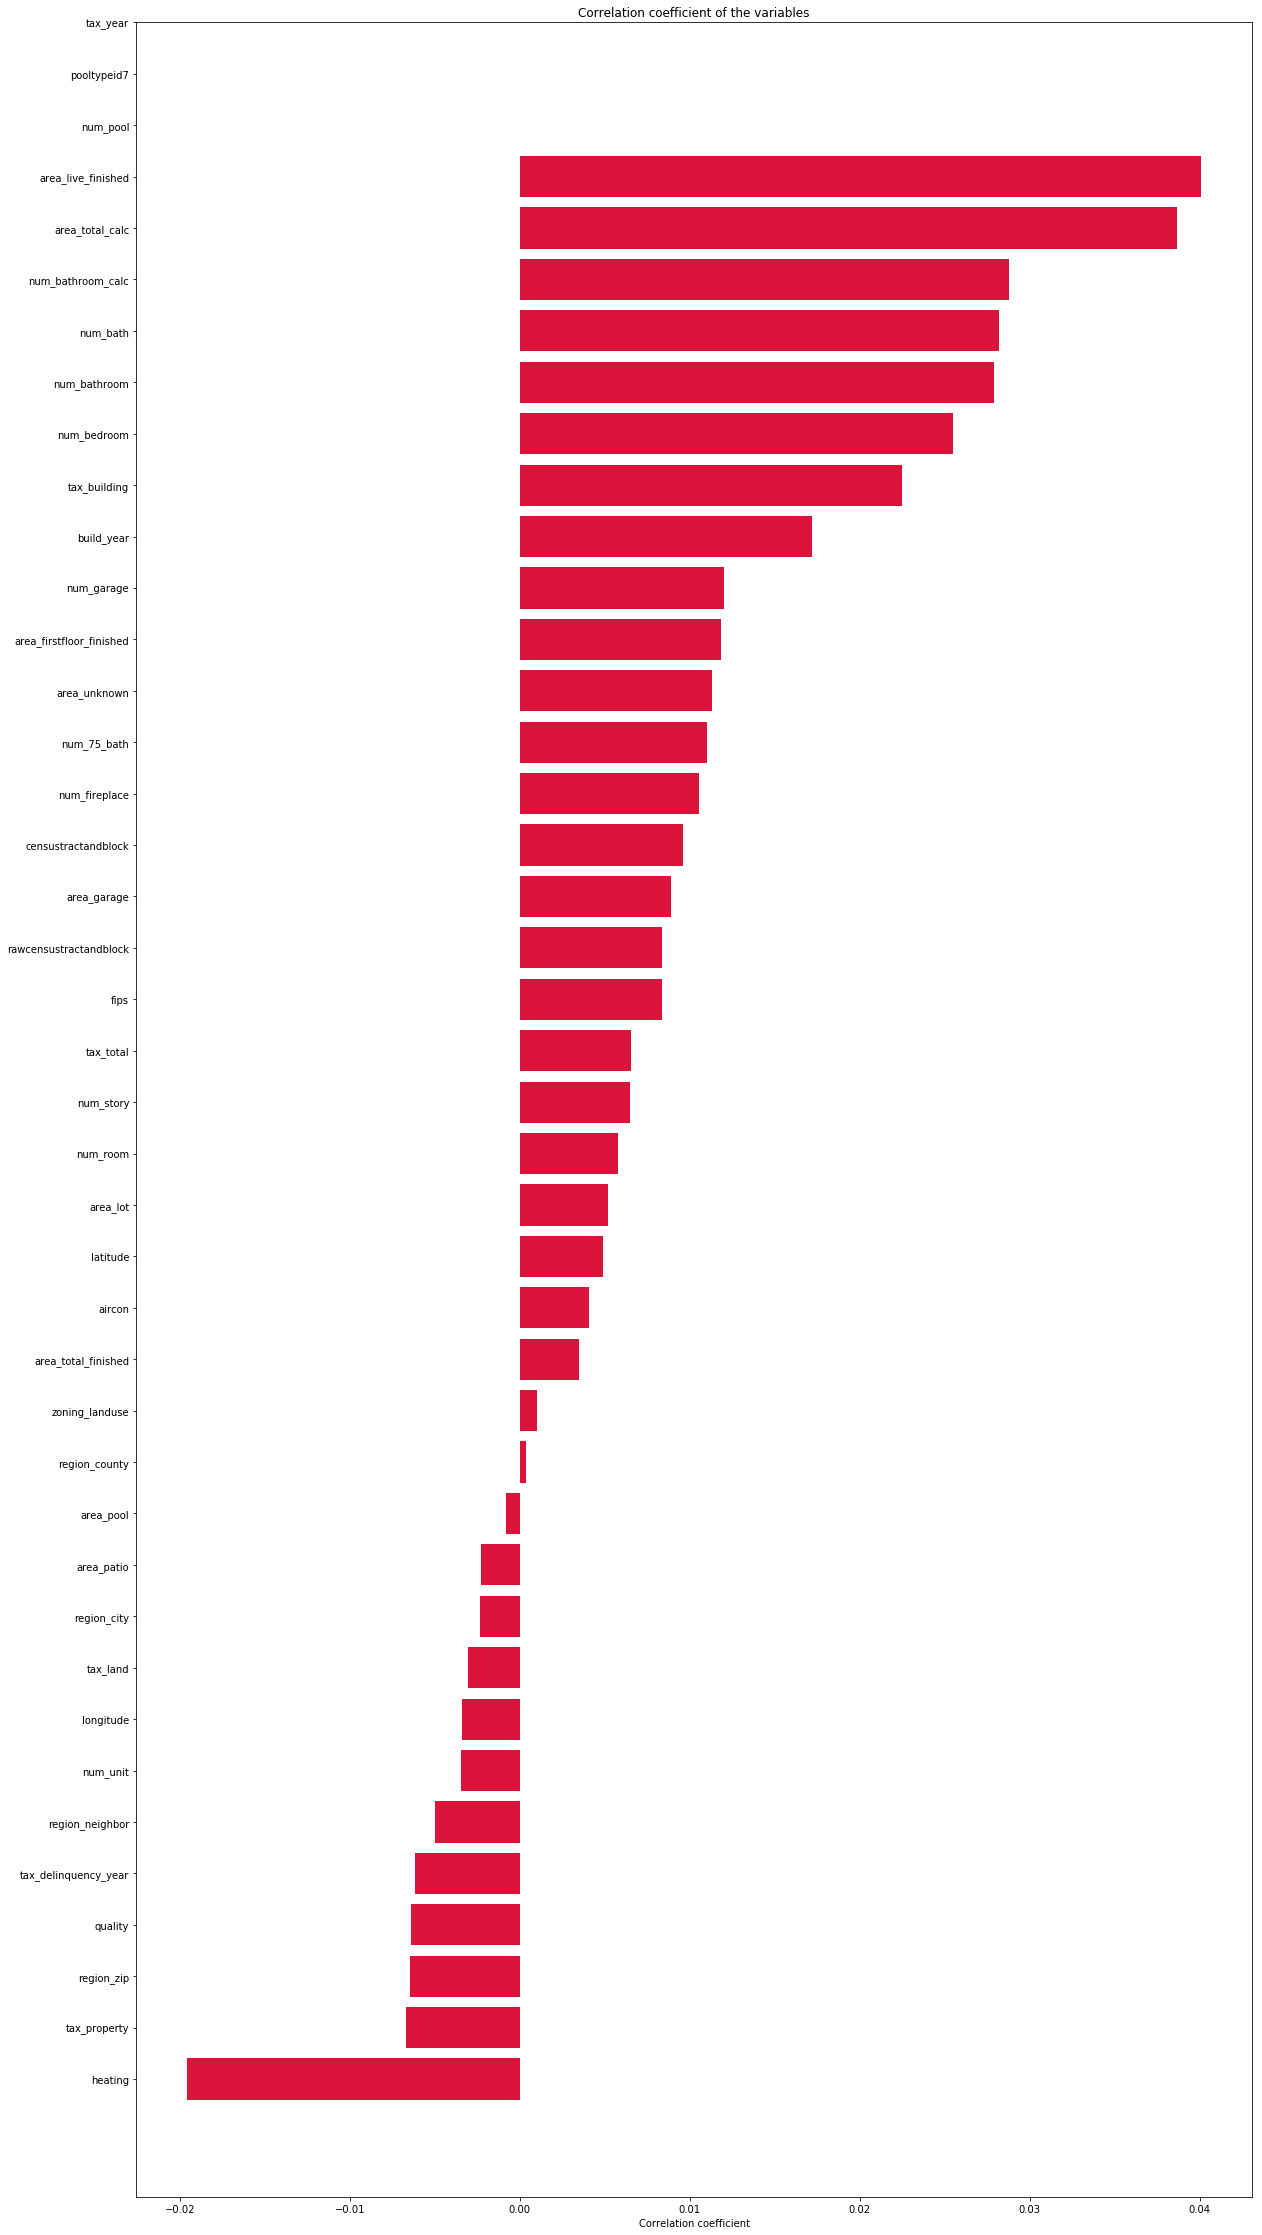

In [72]:
""" etudes de corrélation des variables inspiré de ce notebook https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize"""
import numpy as np
x_cols = [col for col in merged.columns if col not in ['logerror']  if merged[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(merged[col].values, merged.logerror.values)[0,1])
    """numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)[source]
Return Pearson product-moment correlation coefficients"""
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(20,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='crimson')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
plt.show()

41


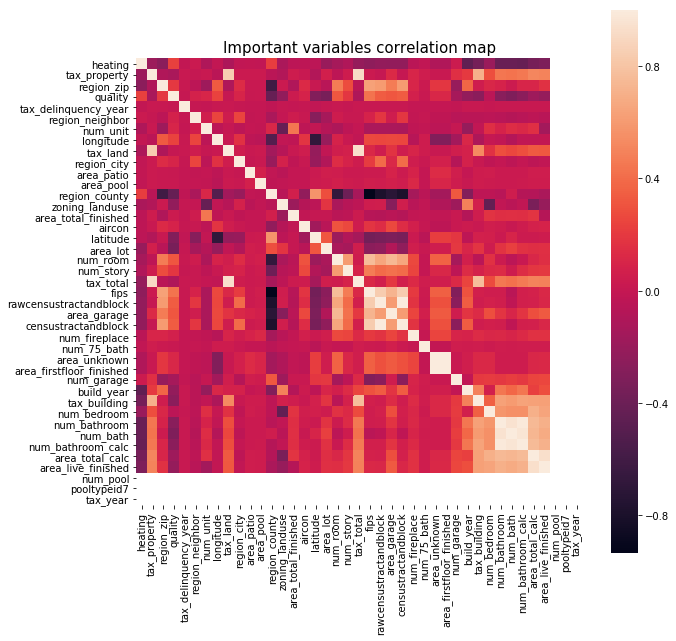

In [73]:
"""affichage d'une heatmap de correlation entre toutes les caractéristiques"""
corr_df_sel = corr_df.ix[(corr_df['corr_values']!=0)]
corr_df_sel
import seaborn as sns
cols_to_use = corr_df_sel.col_labels.tolist()
print len(cols_to_use)

temp_df = merged[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

8


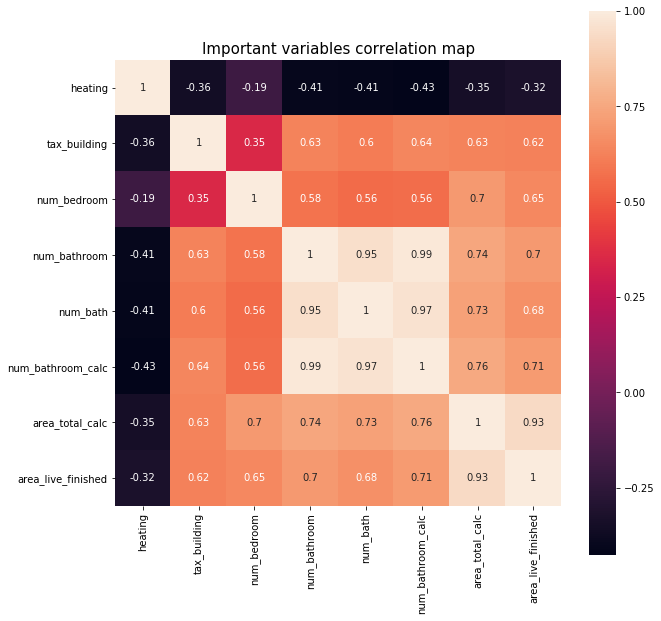

In [74]:
"""affichage d'une heatmap de correlation entre les caractéristiques les corrélations les plus elevés"""
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

cols_to_use = corr_df_sel.col_labels.tolist()
print len(cols_to_use)

temp_df = merged[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., annot=True,square=True)
plt.title("Important variables correlation map", fontsize=15)
plt.show()

On a exploré les possibilités de transformation des valeurs ordinales, il y'a quelques attributs dans le dataset qui sont de ce type, mais après avoir compris leur signification et avoir testé quelques méthodes de transformations, en commencant par un OrdinalEncoder de la libraire sckit learn, qui conciste à attribuer des valeurs numériques pour chaque label, ce qui n'a pas forcément beacoup de sens point de vue statistque (avis subjectif) car attribuer une valeur numérique plus grande pour un Code de zonne par exemple par rapport un à un autre compte va biaiser le modèle, autre méthode OneHotEncoder qui contrairement au à une méthode de qui va transformer les attributs en variables Dummy, et attribuer par exemple un 1 si une  instance contient le code et 0 sinon, elle va encoder les valeurs ordinales en valeurs binaires uniques, après avoir transformé les attribut au préalable en valeur numérique  avec une une fonction LabelEncoder, on a eu des dataframes de 70 colonnes suplémentaires pour representer ces Dummy variables et au vu de la signification de ces attributs et en général pour les  travaux dans les différents notebook réalisés sur ces données et au vu des résultats de régréssion obtenus, on a eu de meilleurs résultats en excluant ces attributs


In [75]:
"""choix du OneHotENcoder pour la codification de nos variables ordinales """
print(merged['zoning_landuse_county'][1000])
print type(merged['zoning_landuse_county'][12])
"""valeurs booléennes remplacées par des valeurs comprises entre 0 et 1"""
#print ((merged['flag_tub'][0]))
#merged['flag_tub'] = merged['flag_tub'].replace(True, 1)
#merged['flag_tub'] = merged['flag_tub'].replace(False, 0)

#merged['zoning_landuse_county'] = pd.to_numeric(merged['zoning_landuse_county'])
#print (merged['zoning_landuse_county'][26])

#pd.to_numeric(merged['zoning_landuse_county'])
""" attribut avec valeurs nominales ici des codes"""
print (merged['zoning_landuse_county'].unique())
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder


X = [['1128', '1129', '1110' ,'1111','0100', '0101', '010D', '010C' ,'010E' ,'0200',
 '0700', '0400', '0300', '122', '34' ,'01DC' ,'1', '012C' ,'01HC' ,'010V' ,'1117',
 '0104', '020G', '0109', '96', '1321', '1222', '1116' ,'010M', '1210', '010G',
 '0103' ,'38' ,'010H', '73', '1112', '0108', '135', '010F' ,'1410' ,'012D' ,'0201',
 '6050', '070D', '1200' ,'0401', '1720', '020M', '105', '012E', '0102', '1310',
 '010', '040V', '030G' ,'0110', '1421' ,'1432', '1011' ,'0111' '0130' ,'1333',
 '01DD', '0' ,'0210' ,'0131' ,'040A' ,'1722', '0105' ,'1420' ,'0114']]
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(X)
C = enc.transform(X).toarray()
from sklearn.preprocessing import OrdinalEncoder
print type(merged['zoning_landuse_county'])
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit_transform(merged[['zoning_landuse_county']])


0100
<type 'str'>
['1128' '1129' '1111' '1110' '010C' '0100' '0101' '010D' '010E' '0200'
 '0700' '0400' '0300' '122' '34' '01DC' '1' '012C' '01HC' '100V' '1117'
 '0104' '020G' '0109' '96' '1321' '010V' '1222' '1116' '010M' '1210'
 '010G' '0103' '38' '010H' '73' '1112' '0108' '135' '010F' '1014' '1410'
 '012D' '0201' '6050' '070D' '1200' '0401' '1720' '020M' '105' '012E'
 '1012' '1011' '1310' '010' '040V' '030G' '0110' '0102' '1421' '1432'
 '0303' '0111' '0130' '1333' '01DD' '0' '0210' '0131' '8800' '040A' '200'
 '0301' '1722' '1420' '0114']
<class 'pandas.core.series.Series'>


array([[54.],
       [55.],
       [50.],
       ...,
       [ 9.],
       [43.],
       [43.]])

In [76]:
"""codification en valeurs uniques binaires, solution potontiellement meilleure que l'encoding ordinal ou Dummy"""
from sklearn.preprocessing import LabelEncoder
lenc = LabelEncoder()
merged['zoning_landuse_county'] = lenc.fit_transform(merged['zoning_landuse_county'])

lenc.classes_

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0], sparse=False)
ohe_results = ohe.fit_transform(merged[['zoning_landuse_county']])
df_ohe_results = pd.DataFrame(ohe_results, columns=lenc.classes_)
df_ohe_results.head()



,0,010,0100,0101,0102,0103,0104,0108,0109,010C,...,1432,1720,1722,200,34,38,6050,73,8800,96
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# création d'un dataframe avec les valeurs ordinales transformés
df = pd.concat([merged.reset_index(drop=True), df_ohe_results.reset_index(drop=True)], axis=1)
df.head()

,id_parcel,aircon,num_bathroom,num_bedroom,quality,num_bathroom_calc,area_firstfloor_finished,area_total_calc,area_live_finished,area_total_finished,...,1432,1720,1722,200,34,38,6050,73,8800,96
0,17073783,1.0,2.5,3.0,7.0,2.5,548.0,1264.0,1264.0,1680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17088994,1.0,1.0,2.0,7.0,1.0,777.0,777.0,777.0,1680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,17100444,1.0,2.0,3.0,7.0,2.0,1101.0,1101.0,1101.0,1680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,17102429,1.0,1.5,2.0,7.0,1.5,1554.0,1554.0,1554.0,1680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17109604,1.0,2.5,4.0,7.0,2.5,1305.0,2415.0,2415.0,1680.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Préprocessing:
Avant de réaliser des modèles sur nos données, on va d'abord les analyser, les regarder dans un premier temps, voir les features(attributs), les échelles de ses features, si y'a des valeurs manquantes.

Normalisation et Standardisation:

Le Feature Scaling permet de préparer les données quand elles ont des échelles différentes. Il permettra d’avoir de meilleurs modèles prédictifs.

Parmi les techniques du feature scaling, on retrouve la Standardisation et la Normalisation.

La normalisation:


afin que les valeurs des attributs soient inclus dans l'intervalle  0,1

La standardisation:


Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False. (source sckitlearn)

['id_parcel', 'flag_tub', 'zoning_landuse_county', 'zoning_property', 'tax_delinquency', 'transactiondate']
statistiques avant standardisation
             aircon  num_bathroom   num_bedroom       quality  \
count  90275.000000  90275.000000  90275.000000  90275.000000   
mean       1.260271      2.279474      3.031869      6.088408   
std        1.721860      1.004271      1.156436      1.664972   
min        1.000000      0.000000      0.000000      1.000000   
25%        1.000000      2.000000      2.000000      4.000000   
50%        1.000000      2.000000      3.000000      7.000000   
75%        1.000000      3.000000      4.000000      7.000000   
max       13.000000     20.000000     16.000000     12.000000   

       num_bathroom_calc  area_firstfloor_finished  area_total_calc  \
count       90275.000000              90275.000000     90275.000000   
mean            2.305168                857.325206      1768.989078   
std             0.970398                228.266810       9

Text(0.5,1,'area_total_calc')

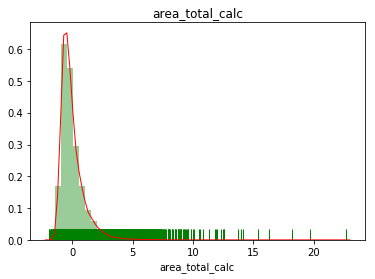

In [79]:
"""standardization"""
object_cols = [col for col in merged.columns if merged[col].dtype!='float64']
merged.drop(object_cols, axis='columns', inplace=True)
print object_cols
merged.head()
print "statistiques avant standardisation"
print(merged.describe())
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged)



scaled_features_df = pd.DataFrame(scaled_data, index=merged.index, columns=merged.columns)

print "statistiques après standardisation"
print scaled_features_df.describe()


from matplotlib import pyplot

sns.distplot(scaled_features_df['area_total_calc'], color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})
#yplot.xlabel('Value')
#yplot.ylabel('Frequency')
pyplot.title('area_total_calc')










Distributions de quelques attributs après standardisation des données

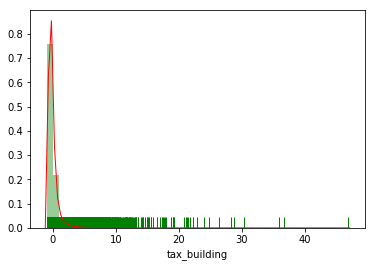

In [80]:
sns.distplot(scaled_features_df['tax_building'], color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})

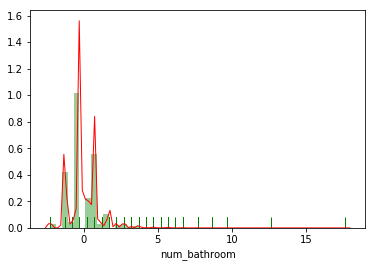

In [81]:
sns.distplot(scaled_features_df['num_bathroom'], color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})

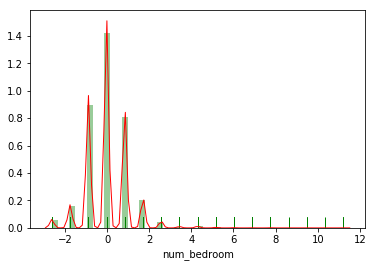

In [82]:
sns.distplot(scaled_features_df['num_bedroom'], color = 'green', rug = True, kde_kws = {'color': 'red', 'lw': 1})

nombre de composantes principales choisis afin d'expliquer 95% de la variance:
24



variance expliquée:
[7.39556707 5.73241246 2.92370914 2.18931493 1.97391133 1.537239
 1.26282073 1.05876163 1.05185188 1.02926814 0.99467017 0.98928167
 0.95288114 0.91293999 0.87061686 0.80693245 0.74368644 0.729543
 0.72212961 0.64032133 0.61484552 0.50893111 0.44855487 0.43269835] 


pourcentage de la variance expliquée
[0.19461767 0.34546868 0.4224074  0.48002021 0.53196457 0.57241771
 0.6056494  0.63351119 0.66119114 0.6882768  0.71445199 0.74048538
 0.76556088 0.7895853  0.81249598 0.83373077 0.85330121 0.87249946
 0.89150263 0.90835297 0.92453291 0.93792566 0.94972958 0.96111623]



la variance expliquée cumulée pour chaque composante principale
[19.46 34.55 42.24 48.   53.19 57.24 60.56 63.35 66.12 68.83 71.45 74.05
 76.56 78.96 81.25 83.37 85.33 87.25 89.15 90.84 92.46 93.8  94.98 96.12]





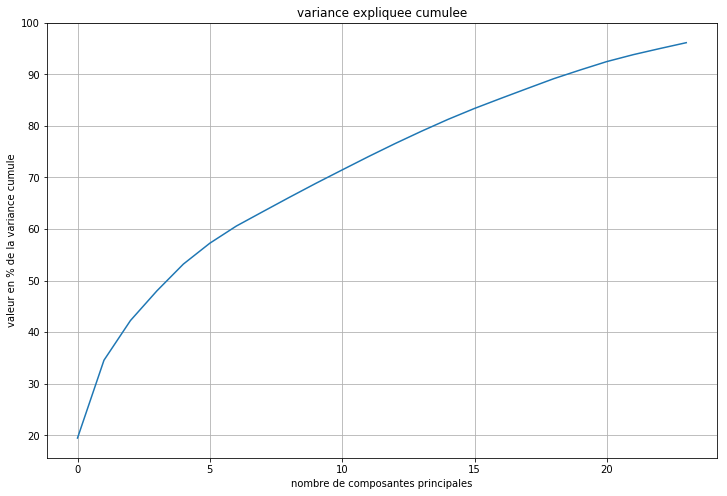

In [83]:

"""utilisation de PCA pour améliorer les performances des modèles"""
cle = 'logerror'
columns=[]
#columns = [ key  if cle != key else pass for key  in merged.keys()]
columns = [key for key  in merged.keys() if key not in cle]

from sklearn.model_selection import train_test_split
#répartition des données  en ensmble de test et ensmble d'entrainement
train_data, test_data, train_lbl, test_lbl = train_test_split(merged[columns], 
                                                              merged['logerror'],
                                                              test_size=1/7.0, 
                                                              random_state=0)


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# entrainnement sur le training set.
scaler.fit(train_data)
# transformation du jeu de données 
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

#pca = PCA(n_components=2)
""". scikit-learn va choisir le nombre minimum de 
composantes principales afin que 95% de la variance est retenue"""

pca.fit(train_scaled)

print 'nombre de composantes principales choisis afin d\'expliquer 95% de la variance:'
print (pca.n_components_) 
print "\n"*2

train_pca = pca.transform(train_scaled)
test_pca = pca.transform(test_scaled)


print ('variance expliquée:')
print pca.explained_variance_,
print "\n" * 2
print ('pourcentage de la variance expliquée')
print pca.explained_variance_ratio_.cumsum()
print "\n" * 2
print  "la variance expliquée cumulée pour chaque composante principale"
variances_expliquee = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#print type(variances_expliquee.tolist())
print np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print "\n" * 2

plt.figure(figsize = (12, 8))
plt.title("variance expliquee cumulee")
plt.xlabel("nombre de composantes principales")
plt.ylabel("valeur en % de la variance cumule")
ax = plt.axes()
ax.plot(variances_expliquee)
fig.figsize=(25, 10)
plt.grid()






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
k = 10
X = train_pca # Matrice colonne plutôt que vecteur ligne
y = train_lbl

from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression(fit_intercept=True)

reg_lin.fit(train_pca[:100], train_lbl[:100])


y_pred = reg_lin.predict(train_pca[:100])
y_pred = np.around(y_pred, decimals=3)
y_true = np.around(train_lbl[:100].to_numpy(), decimals = 3)
#explained_variance_score( y_true, y_pred)

from sklearn.metrics import mean_squared_error
#mean_squared_error(y_true, y_pred)



In [ ]:
"""Extraction des attributs jugés non pertinents pour nos analyses"""
merged.drop(['architectural_style', 'area_basement', 'framing', 'deck','area_base', 'area_liveperi_finished',
            'area_base', 'pooltypeid10', 'pooltypeid2', 'story', 'material', 'area_shed', 'flag_fireplace' ], axis='columns', inplace=True)


In [84]:
print merged.keys()

Index([u'aircon', u'num_bathroom', u'num_bedroom', u'quality',
       u'num_bathroom_calc', u'area_firstfloor_finished', u'area_total_calc',
       u'area_live_finished', u'area_total_finished', u'area_unknown', u'fips',
       u'num_fireplace', u'num_bath', u'num_garage', u'area_garage',
       u'heating', u'latitude', u'longitude', u'area_lot', u'num_pool',
       u'area_pool', u'pooltypeid7', u'zoning_landuse',
       u'rawcensustractandblock', u'region_city', u'region_county',
       u'region_neighbor', u'region_zip', u'num_room', u'num_75_bath',
       u'num_unit', u'area_patio', u'build_year', u'num_story',
       u'tax_building', u'tax_total', u'tax_year', u'tax_land',
       u'tax_property', u'tax_delinquency_year', u'censustractandblock',
       u'logerror'],
      dtype='object')


Text(0,0.5,'Total bedrooms')

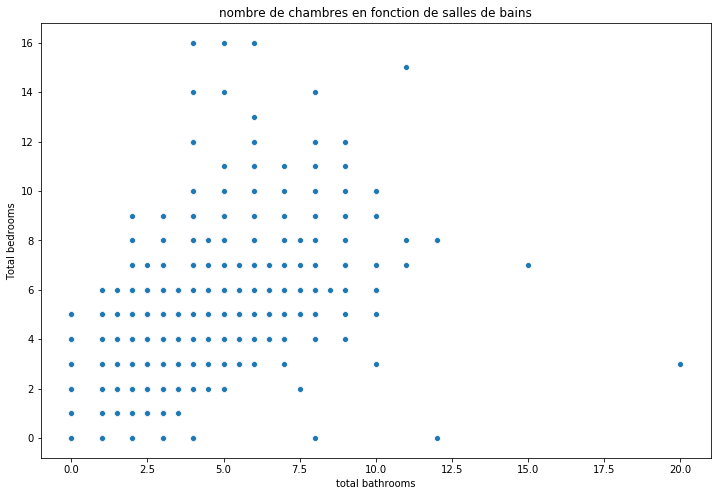

In [85]:
"""etudes de l'importance des variables"""
""" liens entre les attributs"""
#variable yearbuild
import seaborn as sns

plt.figure(figsize = (12, 8))
sns.scatterplot(data = merged,
               x = 'num_bathroom', 
               y = 'num_bedroom')
plt.title("nombre de chambres en fonction de salles de bains")
plt.xlabel("total bathrooms")
plt.ylabel("Total bedrooms")
    



Text(0,0.5,'abs logerror')

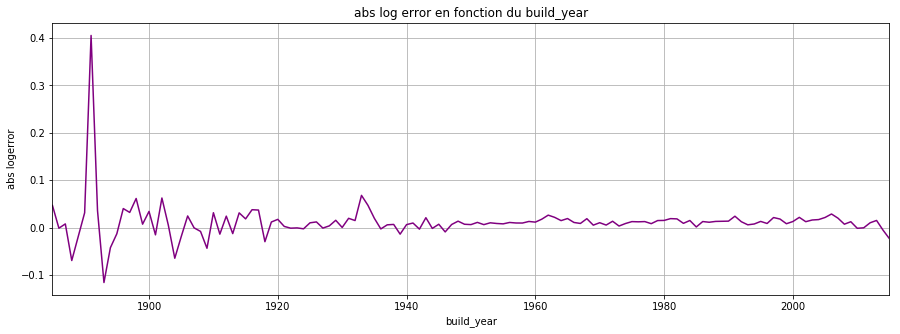

In [86]:
"""etudes de l'importance des variables"""
""" liens entre certaines caractèristiques et le logerror"""
v =merged.groupby(merged['build_year'])['logerror'].mean()
plt.figure(figsize = (12, 8))

ax =v.plot.line(x=v.keys(), figsize=(15, 5), color= 'purple', grid='true')
plt.title("abs log error en fonction du build_year")
plt.xlabel("build_year")
plt.ylabel("abs logerror")

#print merged['build_year'][100]

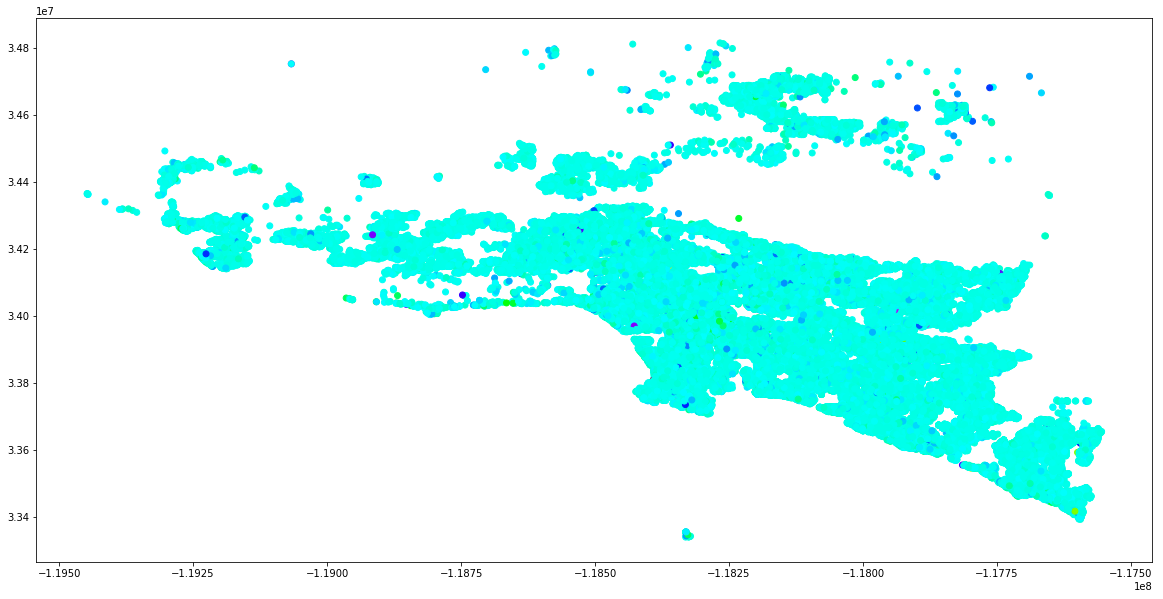

In [87]:

#plot de lattitude et longitude en coloration, on a le logerror

plt.figure(figsize = (20, 10))
plt.scatter(x=merged['longitude'], y=merged['latitude'], c=merged['logerror'], cmap='hsv')






In [88]:
x_cols = [col for col in merged.columns if col not in ['logerror'] if merged[col].dtype=='float64']
print x_cols
df1 = merged.ix[:, x_cols]
print df1

['aircon', 'num_bathroom', 'num_bedroom', 'quality', 'num_bathroom_calc', 'area_firstfloor_finished', 'area_total_calc', 'area_live_finished', 'area_total_finished', 'area_unknown', 'fips', 'num_fireplace', 'num_bath', 'num_garage', 'area_garage', 'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool', 'pooltypeid7', 'zoning_landuse', 'rawcensustractandblock', 'region_city', 'region_county', 'region_neighbor', 'region_zip', 'num_room', 'num_75_bath', 'num_unit', 'area_patio', 'build_year', 'num_story', 'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property', 'tax_delinquency_year', 'censustractandblock']
       aircon  num_bathroom  num_bedroom  quality  num_bathroom_calc  \
0         1.0           2.5          3.0      7.0                2.5   
1         1.0           1.0          2.0      7.0                1.0   
2         1.0           2.0          3.0      7.0                2.0   
3         1.0           1.5          2.0      7.0                1.5   

L'algorithme xgboost, pour xtreme gradient boosting est une implémentation d'algorithme d'arbres de boosting du gradient

définition:
Le Boosting de Gradient est un algorithme d’apprentissage supervisé dont le principe et de combiner les résultats d’un ensemble de modèles plus simple et plus faibles afin de fournir une meilleur prédiction.

L'algorithme va donc combiner plusieurs modèles  et obtenir un seul résultats
il est très utilisés dans les compétitions de ML, et notamment le plus utilisés dans les notebooks de ce challenge, et il permet de fournir plusieurs hyperparametre

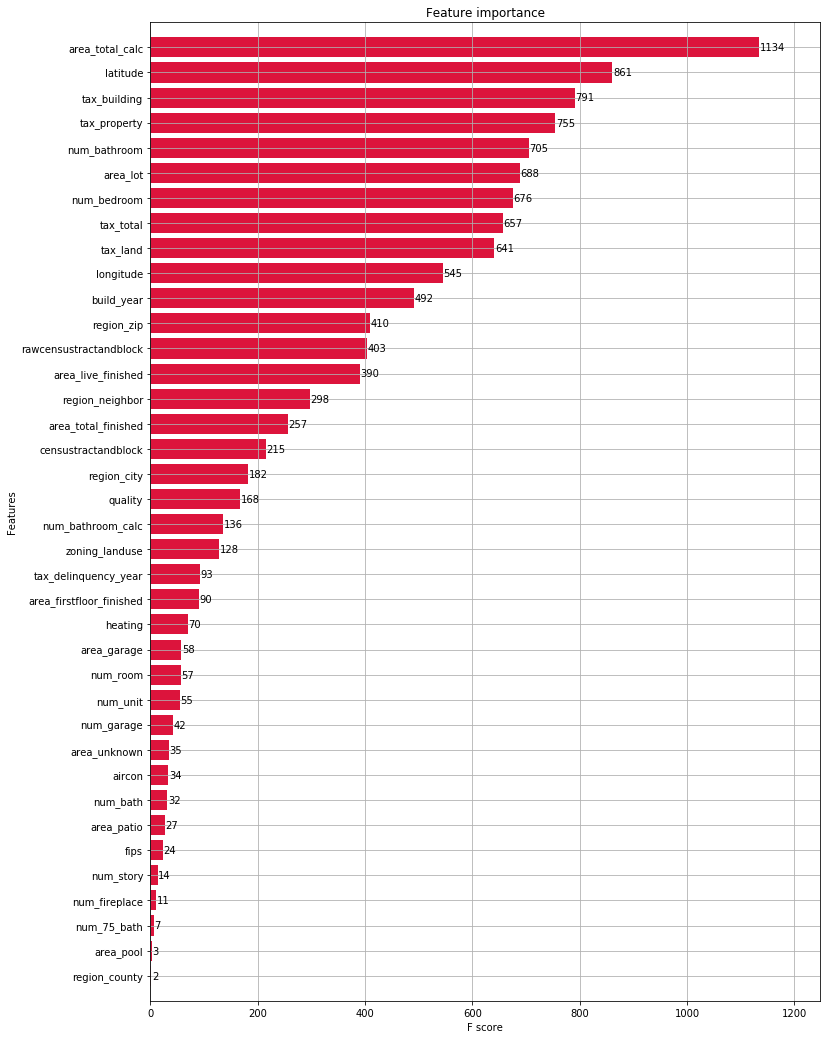

In [89]:
"""importance des caractèristiques, méthode xgboost sans tenir compte des valeur non numérique (exclusion des autres types)"""
import xgboost as xgb
#paramétrage qui permet le non overfiting en choisiant la longeur des arbres et le taux d'apprentissage a chaque ittération
# pour éviter l'overfiting
xgb_params = {
    'eta': 0.05,
    'max_depth': 12,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(df1, merged['logerror'], feature_names=df1.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

# classement des attributs #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax, color='crimson')
plt.show()

In [42]:
feature_names=df1.columns.values
print columns
print len(columns)

['aircon', 'num_bathroom', 'num_bedroom', 'quality', 'num_bathroom_calc', 'area_firstfloor_finished', 'area_total_calc', 'area_live_finished', 'area_total_finished', 'area_unknown', 'fips', 'num_fireplace', 'num_bath', 'num_garage', 'area_garage', 'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool', 'pooltypeid7', 'zoning_landuse', 'rawcensustractandblock', 'region_city', 'region_county', 'region_neighbor', 'region_zip', 'num_room', 'num_75_bath', 'num_unit', 'area_patio', 'build_year', 'num_story', 'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property', 'tax_delinquency_year', 'censustractandblock']
41


on a obtenu le classement de l'importance des caractèristiques des propriétés selon cet ordre avec la méthode xgboost

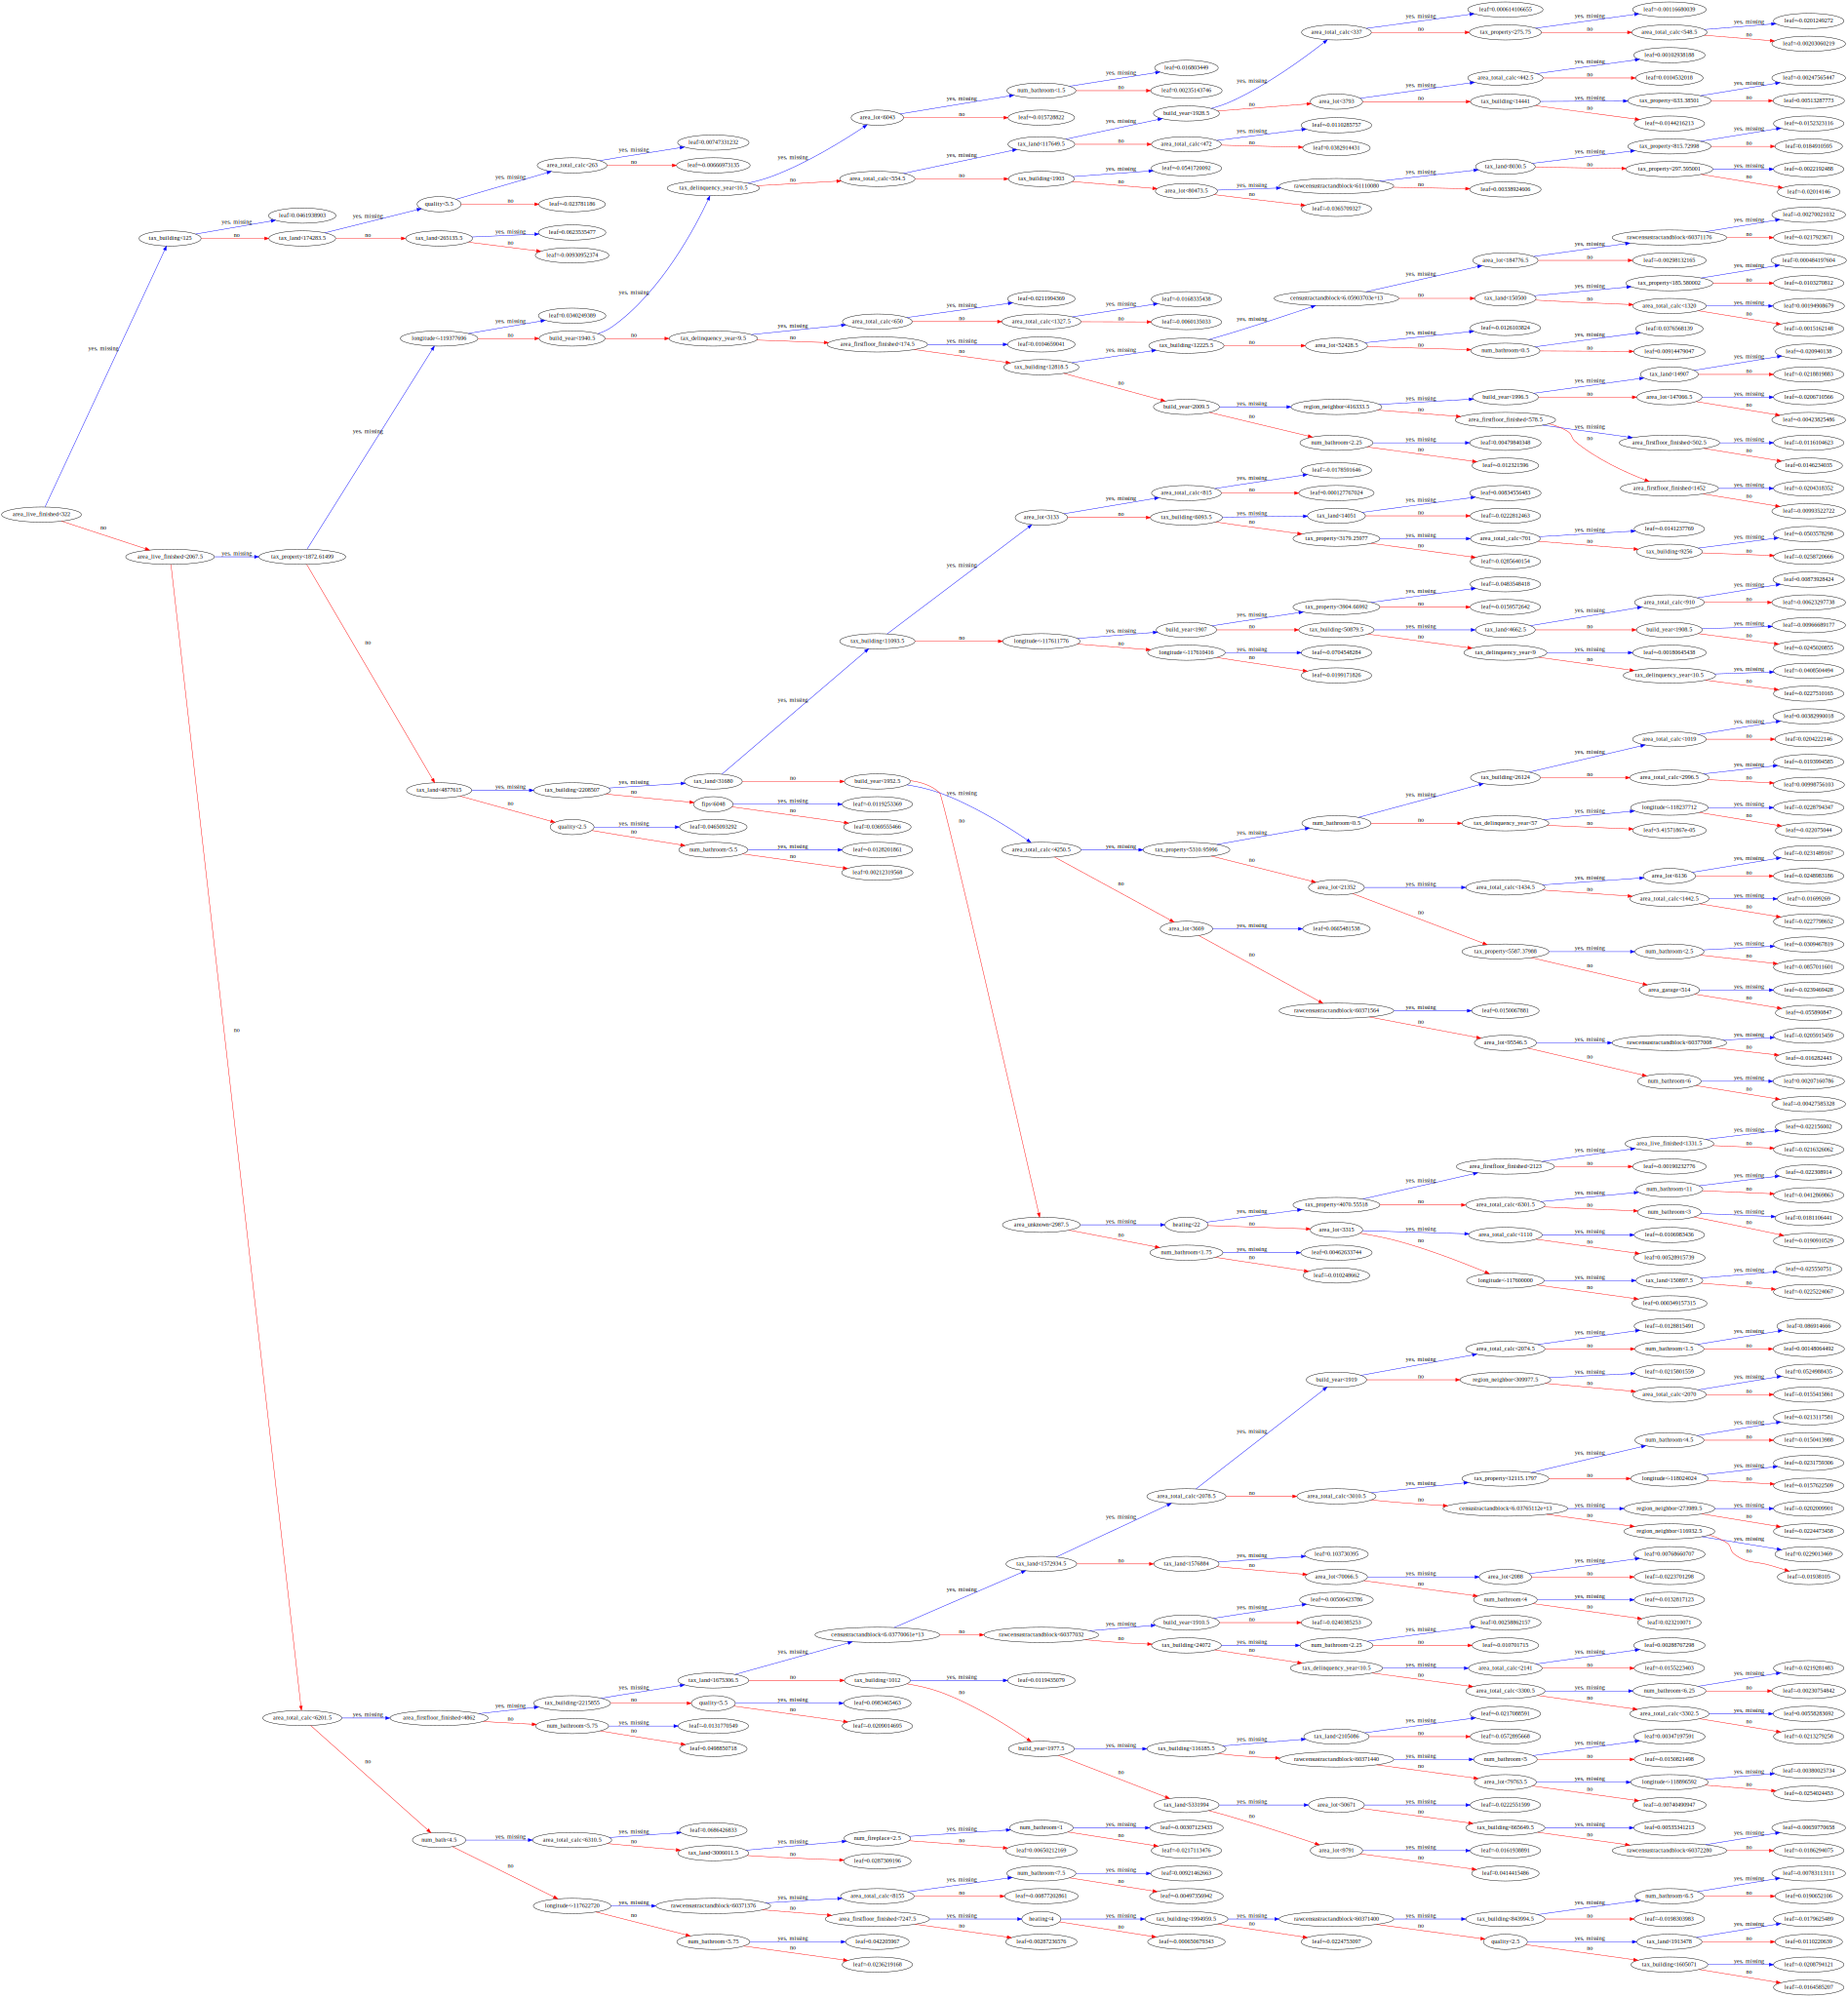

In [90]:
"""affichage de l'arbre de décision réalisé par xgboost"""
xgb.to_graphviz(model, num_trees=2,rankdir='LR')

Dans la partie qui suit on a testé nos différentes formes des données en régréssion (les attributs pertinentes, les composantes principales, les attributs ordinales encodés)

In [91]:
# entrainement d'un modèle xgboost régressor sur les composantes principales obtenus en fonction de 95% de variance expliquée
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_pca[:1000],train_lbl[:1000])


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0, importance_type='gain',
       learning_rate=0.07, max_delta_step=0, max_depth=3,
       min_child_weight=1.5, missing=None, n_estimators=10000, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.75, reg_lambda=0.45, scale_pos_weight=1, seed=42,
       silent=True, subsample=0.6)

In [92]:
y_pred = np.expm1(best_xgb_model.predict(test_pca[:20]))


In [93]:
from sklearn.metrics import explained_variance_score
y_pred = np.expm1(best_xgb_model.predict(train_pca[:1000]))
y_pred = np.around(y_pred, decimals=2)
y_true = np.around(train_lbl[:1000].to_numpy(), decimals = 2)
explained_variance_score(y_pred, y_true)
"""meilleure performance obtenu en faisant la prédiction sur un sous échantillion"""

'meilleure performance obtenu en faisant la pr\xc3\xa9diction sur un sous \xc3\xa9chantillion'

In [94]:
best_xgb_model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=6,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)
best_xgb_model.fit(train_pca[:1000],train_lbl[:1000])

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
y_pred = np.expm1(best_xgb_model.predict(train_pca[:1000]))
y_pred = np.around(y_pred, decimals=3)
y_true = np.around(train_lbl[:1000].to_numpy(), decimals = 3)
explained_variance_score( y_true, y_pred)



mean_squared_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
erreur_general = 1-explained_variance_score(y_true, y_pred)
erreur_general
scores_acp ={'erreur_general': erreur_general,'mse':mse, 'mae':mae }
scores_acp



#print("Erreur de train normalisée (1-explained var)",1-explained_variance_score(y_true, y_pred))

{'erreur_general': 2.5868646881251354,
 'mae': 0.022608000078124923,
 'mse': 0.057859991662471855}

In [132]:
X_test = test["x"].values[:,np.newaxis] 
y_test = test["y"]


from sklearn.metrics import mean_squared_error


In [118]:
explained_variance_score(y_pred,a)

0.5089846204709485

In [120]:
explained_variance_score(y_pred, a)

0.5089846204709485

In [138]:
print df.head()


   id_parcel  aircon  architectural_style  area_basement  num_bathroom  \
0   17073783     1.0                  7.0         1528.0           2.5   
1   17088994     1.0                  7.0         1528.0           1.0   
2   17100444     1.0                  7.0         1528.0           2.0   
3   17102429     1.0                  7.0         1528.0           1.5   
4   17109604     1.0                  7.0         1528.0           2.5   

   num_bedroom  framing  quality  num_bathroom_calc  deck  ...  1432  1720  \
0          3.0      4.0      7.0                2.5  66.0  ...   0.0   0.0   
1          2.0      4.0      7.0                1.0  66.0  ...   0.0   0.0   
2          3.0      4.0      7.0                2.0  66.0  ...   0.0   0.0   
3          2.0      4.0      7.0                1.5  66.0  ...   0.0   0.0   
4          4.0      4.0      7.0                2.5  66.0  ...   0.0   0.0   

   1722  200   34   38  6050   73  8800   96  
0   0.0  0.0  0.0  0.0   0.0  0.0   0.0

In [84]:
scaled_features_df.head()
scaled_features_df.keys()
#print scaled_features_df['logerror']
#print merged['logerror']
#scaled_features_df['logerror'] = merged['logerror']
print scaled_features_df.head()

merged.head()
df.head

     aircon  num_bathroom  num_bedroom   quality  num_bathroom_calc  \
0 -0.151158      0.219590    -0.027558  0.547515           0.200777   
1 -0.151158     -1.274040    -0.892289  0.547515          -1.344990   
2 -0.151158     -0.278287    -0.027558  0.547515          -0.314479   
3 -0.151158     -0.776163    -0.892289  0.547515          -0.829734   
4 -0.151158      0.219590     0.837173  0.547515           0.200777   

   area_firstfloor_finished  area_total_calc  area_live_finished  \
0                 -1.355111        -0.545319           -0.506773   
1                 -0.351894        -1.071213           -1.051361   
2                  1.067506        -0.721337           -0.689048   
3                  3.052037        -0.232159           -0.182480   
4                  1.961202         0.697603            0.780334   

   area_total_finished  area_unknown  ...  build_year  num_story  \
0            -0.109577     -1.323601  ...    0.741925   2.820431   
1            -0.109577     -

<bound method DataFrame.head of        id_parcel  aircon  num_bathroom  num_bedroom  quality  \
0       17073783     1.0           2.5          3.0      7.0   
1       17088994     1.0           1.0          2.0      7.0   
2       17100444     1.0           2.0          3.0      7.0   
3       17102429     1.0           1.5          2.0      7.0   
4       17109604     1.0           2.5          4.0      7.0   
5       17125829     1.0           2.5          4.0      7.0   
6       17132911     1.0           2.0          3.0      7.0   
7       17134926     1.0           2.5          5.0      7.0   
8       17139988     1.0           2.0          3.0      7.0   
9       17167359     1.0           1.0          3.0      7.0   
10      17179760     1.0           2.0          4.0      7.0   
11      17198685     1.0           2.5          4.0      7.0   
12      17212207     1.0           2.0          5.0      7.0   
13      17213421     1.0           3.0          3.0      7.0   
14      

In [86]:
#print  x_cols
liste_modeles_scores = []

['aircon', 'num_bathroom', 'num_bedroom', 'quality', 'num_bathroom_calc', 'area_firstfloor_finished', 'area_total_calc', 'area_live_finished', 'area_total_finished', 'area_unknown', 'fips', 'num_fireplace', 'num_bath', 'num_garage', 'area_garage', 'heating', 'latitude', 'longitude', 'area_lot', 'num_pool', 'area_pool', 'pooltypeid7', 'zoning_landuse', 'rawcensustractandblock', 'region_city', 'region_county', 'region_neighbor', 'region_zip', 'num_room', 'num_75_bath', 'num_unit', 'area_patio', 'build_year', 'num_story', 'tax_building', 'tax_total', 'tax_year', 'tax_land', 'tax_property', 'tax_delinquency_year', 'censustractandblock']


In [153]:
"""Régréssion sur des données standardisés numériques seulement"""
scores_stdrnum ={}
# test_size: what proportion of original data is used for test set
xtrain, xtest, ytrain, ytest = train_test_split(scaled_features_df[x_cols], 
                                                              merged['logerror'],
                                                              test_size=1/7.0, 
                                                              random_state=0)






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
#X = train_pca # Matrice colonne plutôt que vecteur ligne
#y = train_lbl

from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression(fit_intercept=True)

reg_lin.fit(xtrain, ytrain)


y_pred = reg_lin.predict(xtrain)

y_pred = np.around(y_pred, decimals=3)

y_true = np.around(ytrain.to_numpy(), decimals = 3).tolist()
#print ytest
mse = mean_absolute_error( y_true, y_pred)
print y_pred[:10]
print y_true[:10]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
erreur_general = 1-explained_variance_score(y_true, y_pred)
erreur_general
scores_stdrnum ={'erreur_general': erreur_general,'mse':mse, 'mae':mae }
scores_stdrnum




[ 0.     0.001  0.013  0.009 -0.003  0.025  0.001  0.005  0.017  0.019]
[-0.02, 0.0, -0.008, -0.081, -0.032, -0.026, -0.011, -0.041, -0.098, 0.247]


{'erreur_general': 0.9934614190313762,
 'mae': 0.06873285688438573,
 'mse': 0.02596930681847553}

In [154]:
"""Régréssion sur des données standardisés numériques seulement"""
scores_stdrnum ={}

# test_size: what proportion of original data is used for test set
xtrain, xtest, ytrain, ytest = train_test_split(merged[x_cols], 
                                                              merged['logerror'],
                                                              test_size=1/7.0, 
                                                              random_state=0)






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
#X = train_pca # Matrice colonne plutôt que vecteur ligne
#y = train_lbl

from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression(fit_intercept=True)

reg_lin.fit(xtrain, ytrain)


y_pred = reg_lin.predict(xtrain)

y_pred = np.around(y_pred, decimals=3)

y_true = np.around(ytrain.to_numpy(), decimals = 3).tolist()
#print ytest
mse = mean_absolute_error( y_true, y_pred)
print y_pred[:10]
print y_true[:10]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
erreur_general = 1-explained_variance_score(y_true, y_pred)
erreur_general
scores_stdrnum ={'erreur_general': erreur_general,'mse':mse, 'mae':mae }
scores_stdrnum



[ 0.     0.001  0.013  0.009 -0.003  0.025  0.001  0.005  0.017  0.019]
[-0.02, 0.0, -0.008, -0.081, -0.032, -0.026, -0.011, -0.041, -0.098, 0.247]


{'erreur_general': 0.9934606968321642,
 'mae': 0.06873281811367572,
 'mse': 0.025969287937139755}

In [159]:
"""Régréssion sur les ACP """
scores_stdrnum ={}
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
xtrain, xtest, ytrain, ytest = train_test_split(scaled_features_df[x_cols], 
                                                              merged['logerror'],
                                                              test_size=1/7.0, 
                                                              random_state=0)






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression(fit_intercept=True)

reg_lin.fit(train_pca, train_lbl)


y_pred = reg_lin.predict(train_pca)

y_pred = np.around(y_pred, decimals=3)

y_true = np.around(train_lbl.to_numpy(), decimals = 3).tolist()
#print ytest
mse = mean_absolute_error( y_true, y_pred)
print y_pred[:10]
print y_true[:10]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
erreur_general = 1-explained_variance_score(y_true, y_pred)
erreur_general
scores_stdrnum ={'erreur_general': erreur_general,'mse':mse, 'mae':mae }
scores_stdrnum



[0.002 0.013 0.01  0.005 0.005 0.024 0.009 0.009 0.011 0.015]
[-0.02, 0.0, -0.008, -0.081, -0.032, -0.026, -0.011, -0.041, -0.098, 0.247]


{'erreur_general': 0.996866216973792,
 'mae': 0.06883642637442167,
 'mse': 0.026058309170565272}

In [166]:
"""Régréssion sur les caractéristiques importantes (jugées par xgboost)"""
important_features=['area_total_calc','latitude', 'tax_building', 'tax_property', 'num_bathroom']
scores_stdrnum ={}
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
xtrain, xtest, ytrain, ytest = train_test_split(merged[important_features], 
                                                              merged['logerror'],
                                                              test_size=1/7.0, 
                                                              random_state=0)






from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score


from sklearn.linear_model import LinearRegression
reg_lin = LinearRegression(fit_intercept=True)

reg_lin.fit(xtrain, ytrain)


y_pred = reg_lin.predict(xtrain)

y_pred = np.around(y_pred, decimals=3)

y_true = np.around(ytrain.to_numpy(), decimals = 3).tolist()
#print ytest
mse = mean_absolute_error( y_true, y_pred)
print y_pred[:10]
print y_true[:10]
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
erreur_general = 1-explained_variance_score(y_true, y_pred)
erreur_general
scores_stdrnum ={'erreur_general': erreur_general,'mse':mse, 'mae':mae }
scores_stdrnum



[0.002 0.018 0.008 0.011 0.001 0.023 0.005 0.009 0.015 0.01 ]
[-0.02, 0.0, -0.008, -0.081, -0.032, -0.026, -0.011, -0.041, -0.098, 0.247]


{'erreur_general': 0.9961742288855999,
 'mae': 0.06866617126314974,
 'mse': 0.026040220489027887}

Malgrès nos études divérses en essayant des méthodes afin d'amliorer la qualité de nos données afin d'améliorer la prédiction, néanmoins la difficulté de ce dataset au vu de sa taille et la variété des natures et des échélles de valeurs, les performances de prédiction en généralisation ont été compliqués, la méilleur performance a été un score de 0.5 en variance explained score sur un sous échaintillion, nous avons essayé de nous inspirer des notebooks réalisés sur ce projet, mais on a trouvé aucun qui a étuidé des performances, on c'est donc focalisé sur l'étude des données et on a apris de nouveaux algorithmes et différentes étapes du pré-processing